Let's sample and perform an 8-point DFT on a continuous input signal containing components at 1 kHz and 2 kHz and sample it every t_s = 1 / f_s. f_s =  8 kHz.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

OSError: 'seaborn-poster' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

Generate a sequence of time points for signal processing.

In [37]:
# samp_rate is the number of samples per second (for instance value 100 means 100 Hz).
f_s = 8000

# N - number of elements (samples) for DFT
# n - the indice for the input samples ( n = N - 1 )
# m - the indice for the output samples ( m = N - 1 )
N = 8

# Time interval between each sample
t_s = 1.0 / f_s

# t is an array of time points. It starts at 0 seconds, ends just before 1 second, incrementing by time_s with each step.
t = np.arange ( 0 , N * t_s , t_s )
print ( f"{t=}" )

t=array([0.      , 0.000125, 0.00025 , 0.000375, 0.0005  , 0.000625,
       0.00075 , 0.000875])


Generate 2 sine waves with frequencies 1 kHz and 2 kHz shifted in phase by 135° (3π/4 radians) relative to the 1 kHz sinewave.

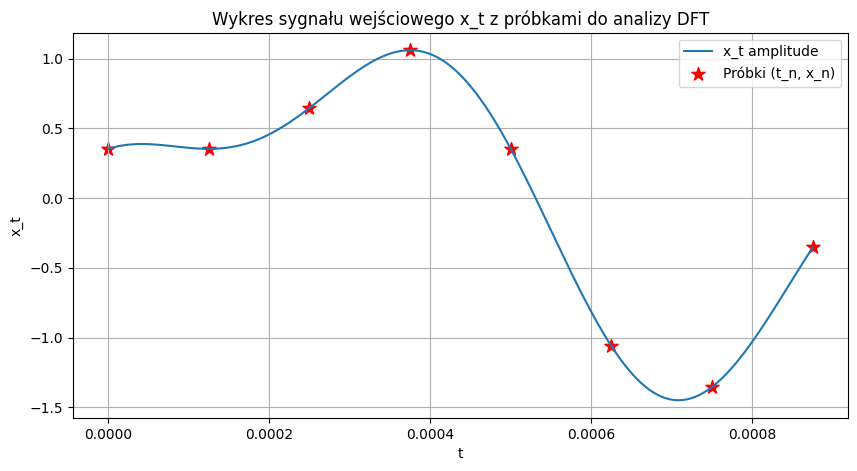

In [40]:
freq1 = 1000.0
freq2 = 2000.0
x_t = np.sin ( 2 * np.pi * freq1 * t ) + 0.5 * np.sin ( 2 * np.pi * freq2 * t + 3 * np.pi/4 )

plot_count = 1000 # 1000 punktów na optrzeby rysunku
t_plot = np.linspace ( 0 , ( N - 1 ) * ( 1 / f_s ) , num = plot_count )  # 1000 punktów w tym zakresie
x_t_plot = np.sin ( 2 * np.pi * freq1 * t_plot ) + 0.5 * np.sin ( 2 * np.pi * freq2 * t_plot + 3 * np.pi/4 )
plt.figure ( figsize = ( 10 , 5 ) )
plt.plot ( t_plot , x_t_plot , label = 'x_t amplitude' )
plt.scatter ( t , x_t , color = 'red' , marker = '*' , s = 100 , label = 'Próbki (n)' )
plt.title ( 'Wykres sygnału wejściowego x_t z próbkami do analizy DFT' )
plt.xlabel ( 't' )
plt.ylabel ( 'x_t' )
plt.legend ()
plt.grid ( True )
plt.show ()

Define dft ( x ) function which will calculate the DFT of the signal x ( t ) and takes in arguments:
x - input 1 dimensional real-valued signal.
N - number of elements

In [38]:
def dft ( x , N ) :
    x = np.array ( x )
    if x.size < N:
        x = np.pad ( x , ( 0 , N - x.size ) , 'constant' )
        print ( "Warning: x(t) padding because x.size < N" )
    elif x.size > N:
        x = x[:N]
    pprint.pprint ( f"{x=}" )

    # Initialize the array for DFT results
    X = np.zeros ( N , dtype = complex )
    pprint.pprint ( f"{X=}" )

    for m in range ( N ) :
        for n in range ( N ) :
            angle = -2j * np.pi * m * n / N
            X[m] += x[n] * np.exp ( angle )
    pprint.pprint ( f"{X=}" )
    
    return X

('x=array([0.        , 0.64995109, 1.24301   , 1.73098263, 2.08154121,\n'
 '       2.282616  , 2.34327722, 2.29102039, 2.1660258 , 2.01350931])')
('X=array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,\n'
 '       0.+0.j, 0.+0.j])')
('X=array([16.80193365+0.00000000e+00j, -3.89700186+2.36579173e+00j,\n'
 '       -1.53882206+1.26124834e+00j, -1.24242553+6.74029663e-01j,\n'
 '       -1.15560477+3.02422209e-01j, -1.13422519-1.12846928e-15j,\n'
 '       -1.15560477-3.02422209e-01j, -1.24242553-6.74029663e-01j,\n'
 '       -1.53882206-1.26124834e+00j, -3.89700186-2.36579173e+00j])')


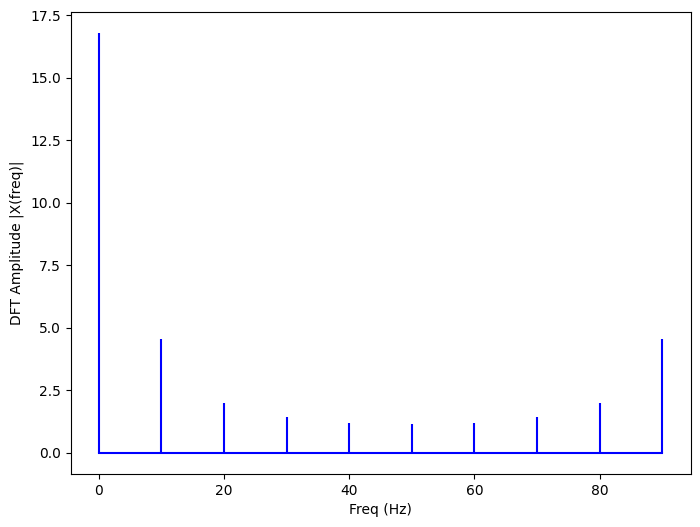

In [42]:
N = 10
X = dft ( x , N )

n = np.arange ( N )
T = N / samp_rate
freq = n / T 

plt.figure ( figsize = ( 8 , 6 ) )
plt.stem ( freq , abs ( X ) , 'b' , \
         markerfmt=" ", basefmt="-b")
plt.xlabel ( 'Freq (Hz)' )
plt.ylabel ( 'DFT Amplitude |X(freq)|' )
plt.show ()